In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np   #libraries imported

cifar= tf.keras.datasets.cifar10    #data import 

(training_data, training_labels),(testing_data, testing_labels)=cifar.load_data()  #data ko divide karra hai in training and testing

# training_data

classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
training_data.shape   # to check the number of images and to identify the shape of each image

(50000, 32, 32, 3)

In [15]:
training_labels.shape   # to verify the number of images given 

(50000, 1)

In [17]:
#normalization
training_data=training_data/255.0
testing_data=testing_data/255.0    
#to scale them down between 0 and 1 , to ensure 
# that vanishing and exploding gradient problems do not occur

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')    
])

In [21]:
#architecture, compilation, fit

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(training_data,training_labels,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5718 - accuracy: 0.4314
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1997 - accuracy: 0.5750
Epoch 3/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0675 - accuracy: 0.6270
Epoch 4/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9880 - accuracy: 0.6553
Epoch 5/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9267 - accuracy: 0.6764
Epoch 6/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8858 - accuracy: 0.6908
Epoch 7/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8521 - accuracy: 0.7062
Epoch 8/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8179 - accuracy: 0.7169
Epoch 9/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7945 - accuracy: 0.7245
Epoch 10/15
1563/1563 [==============================] - 46s 30m

In [24]:
test_loss,test_accuracy=model.evaluate(testing_data,testing_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.9833 - accuracy: 0.6777


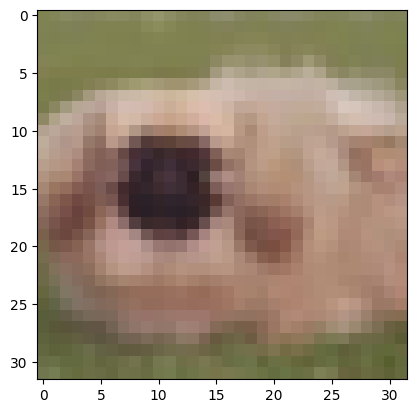

In [33]:
plt.imshow(testing_data[31])

In [34]:
predictions=model.predict(testing_data)

313/313 [==============================] - 3s 9ms/step


In [36]:
predictions[31]

array([5.7596958e-04, 2.3453627e-04, 2.1368809e-01, 2.0684652e-01,
       1.6299118e-01, 3.8057327e-01, 1.0014663e-02, 2.3291538e-02,
       4.8156496e-04, 1.3026855e-03], dtype=float32)

In [37]:
np.argmax(predictions[31])

5

In [38]:
classes[np.argmax(predictions[31])]

'dog'

In [39]:
# we have a cifar dataset with us which contains 60000 images belonging to 10 classes
# we divided this into 2 parts one being 50000 images for the training part and 10000 for the testing part
# along with this we also normalized the images to ensure values stay between 0 and 1
# we created a model from scratch in which we have 2 convolution layers, 2 maxpool layers,
# one flatten and two fully connected layers
# for compilation we used adam as the optimizer, sparse categorical crossentropy as the loss,
# and accuracy as the metric and we trained the model for 15 epochs
# after which we got a result of 67% when tested on unseen data 

# Data
# Preprocessing
# Model Creation(Arch and compile)
# Result


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                7

In [42]:
model.save('CNN_Cifar10.h5')

C:\Users\Krishang Virmani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
